In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [23]:
df = pd.read_csv("SCdata_EGF_serum.csv")

In [24]:
df.dtypes


WellName                                    object
Serum                                       object
EGF Concentration                           object
Phase                                       object
ScreenName                                  object
ScreenID                                     int64
PlateName                                   object
PlateID                                      int64
MeasurementDate                             object
MeasurementID                                int64
Row                                          int64
Column                                       int64
Field                                        int64
Plane                                        int64
Timepoint                                    int64
Object Number                                int64
X                                            int64
Y                                            int64
Bounding Box                                object
Object No in Nuclei Selected Se

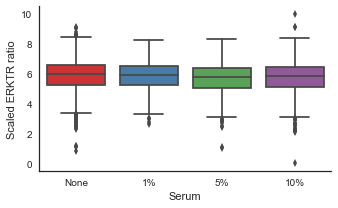

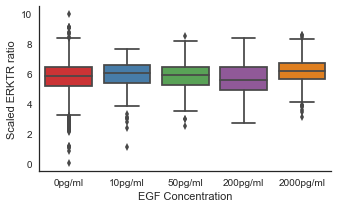

In [27]:
%matplotlib inline
sns.set_style("white")
sns.factorplot(
    data=df,
    kind='box', 
    x='Serum', 
    y='Scaled ERKTR ratio', 
    order = ["None", "1%", "5%", "10%"],
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

sns.factorplot(
    data=df,
    kind='box', 
    x='EGF Concentration', 
    y='Scaled ERKTR ratio', 
    order = ["0pg/ml", "10pg/ml", "50pg/ml", "200pg/ml","2000pg/ml"],
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' use a nice categorical colour scheme
    )
plt.savefig("EGF.PDF")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

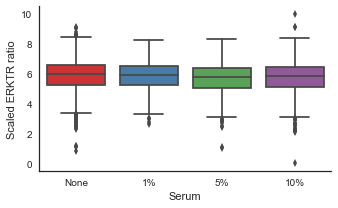

In [29]:
%matplotlib inline
sns.set_style("white")
sns.factorplot(
    data=df,
    kind='box', 
    x='Serum', 
    y='Scaled ERKTR ratio', 
    order = ["None", "1%", "5%", "10%"],
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )
plt.savefig("serumstarve.PDF")

/Users/csimpson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


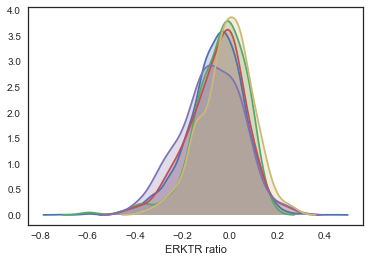

In [31]:
sns.set_style("white")

NOEGF = df[df['EGF Concentration'] == "0pg/ml"]
sns.distplot(NOEGF['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
EGF10 = df[df['EGF Concentration'] == '10pg/ml']
sns.distplot(EGF10['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
EGF50 = df[df['EGF Concentration'] == '50pg/ml']
sns.distplot(EGF50['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
EGF200 = df[df['EGF Concentration'] == '200pg/ml']
sns.distplot(EGF200['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
EGF2000 = df[df['EGF Concentration'] == '2000pg/ml']
sns.distplot(EGF2000['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})

plt.savefig("EGFdistribrutions.pdf")

/Users/csimpson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


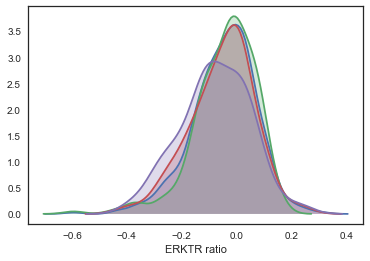

In [33]:
sns.set_style("white")

NOSerum = df[df['Serum'] == "None"]
sns.distplot(NOSerum['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
Serum1 = df[df['Serum'] == '1%']
sns.distplot(EGF10['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
Serum5 = df[df['Serum'] == '5%']
sns.distplot(EGF50['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
Serum10 = df[df['Serum'] == '10%']
sns.distplot(EGF200['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})

plt.savefig("Serumdistribrutions.pdf")

In [67]:
df_combos = pd.read_csv("Combos_SC.csv")

In [68]:
df_combos.dtypes

WellName                                    object
Drug24hours                                 object
Drug2hours                                  object
Phase                                       object
ScreenName                                  object
ScreenID                                     int64
PlateName                                   object
PlateID                                      int64
MeasurementDate                             object
MeasurementID                                int64
Row                                          int64
Column                                       int64
Field                                        int64
Plane                                        int64
Timepoint                                    int64
Object Number                                int64
X                                            int64
Y                                            int64
Bounding Box                                object
Object No in Nuclei Selected Se

In [69]:
DMSO = df_combos[df_combos['Drug2hours'] == "DMSO"]
MEKi = df_combos[df_combos['Drug2hours'] == "Binimetinib"]

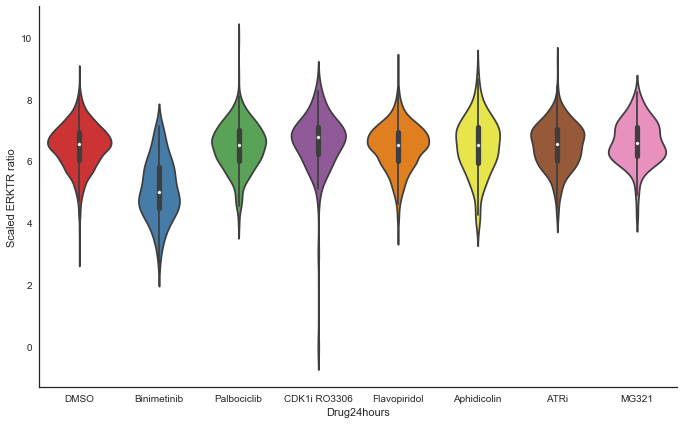

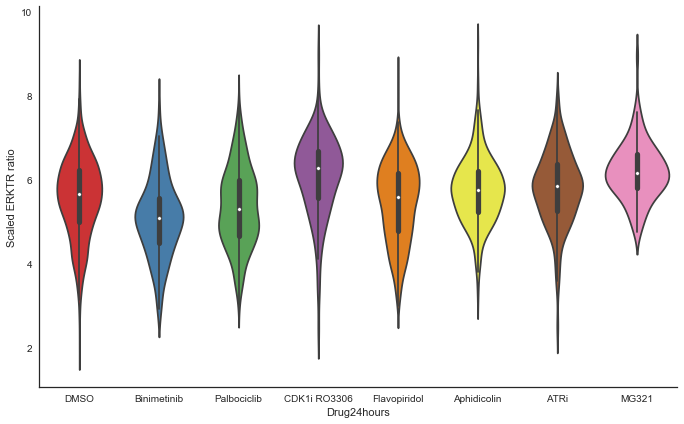

In [78]:
plt.figure(figsize=(16,8))
sns.set_style("white")
sns.factorplot(
    data=DMSO,
    kind='violin', 
    x='Drug24hours', 
    y='Scaled ERKTR ratio', 
    order = ["DMSO", "Binimetinib","Palbociclib","CDK1i RO3306", "Flavopiridol", "Aphidicolin", "ATRi", "MG321"],
    size=6, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

sns.set_style("white")
sns.factorplot(
    data=MEKi,
    kind='violin', 
    x='Drug24hours', 
    y='Scaled ERKTR ratio', 
    order = ["DMSO", "Binimetinib","Palbociclib","CDK1i RO3306","Flavopiridol", "Aphidicolin", "ATRi", "MG321"],
    size=6, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )



#plt.savefig("EGF.PDF")

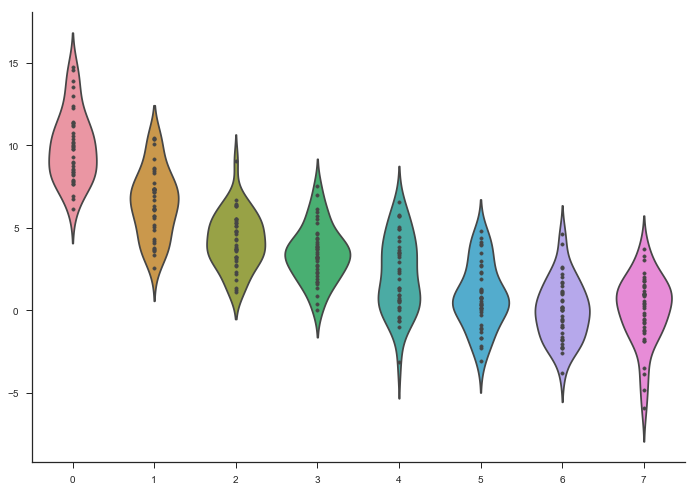

In [64]:
combos_mean = df_combos.groupby("WellName", as_index = False).mean()
combos_mean

combos_mean.to_csv("combos_mean")